<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/fourier_phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

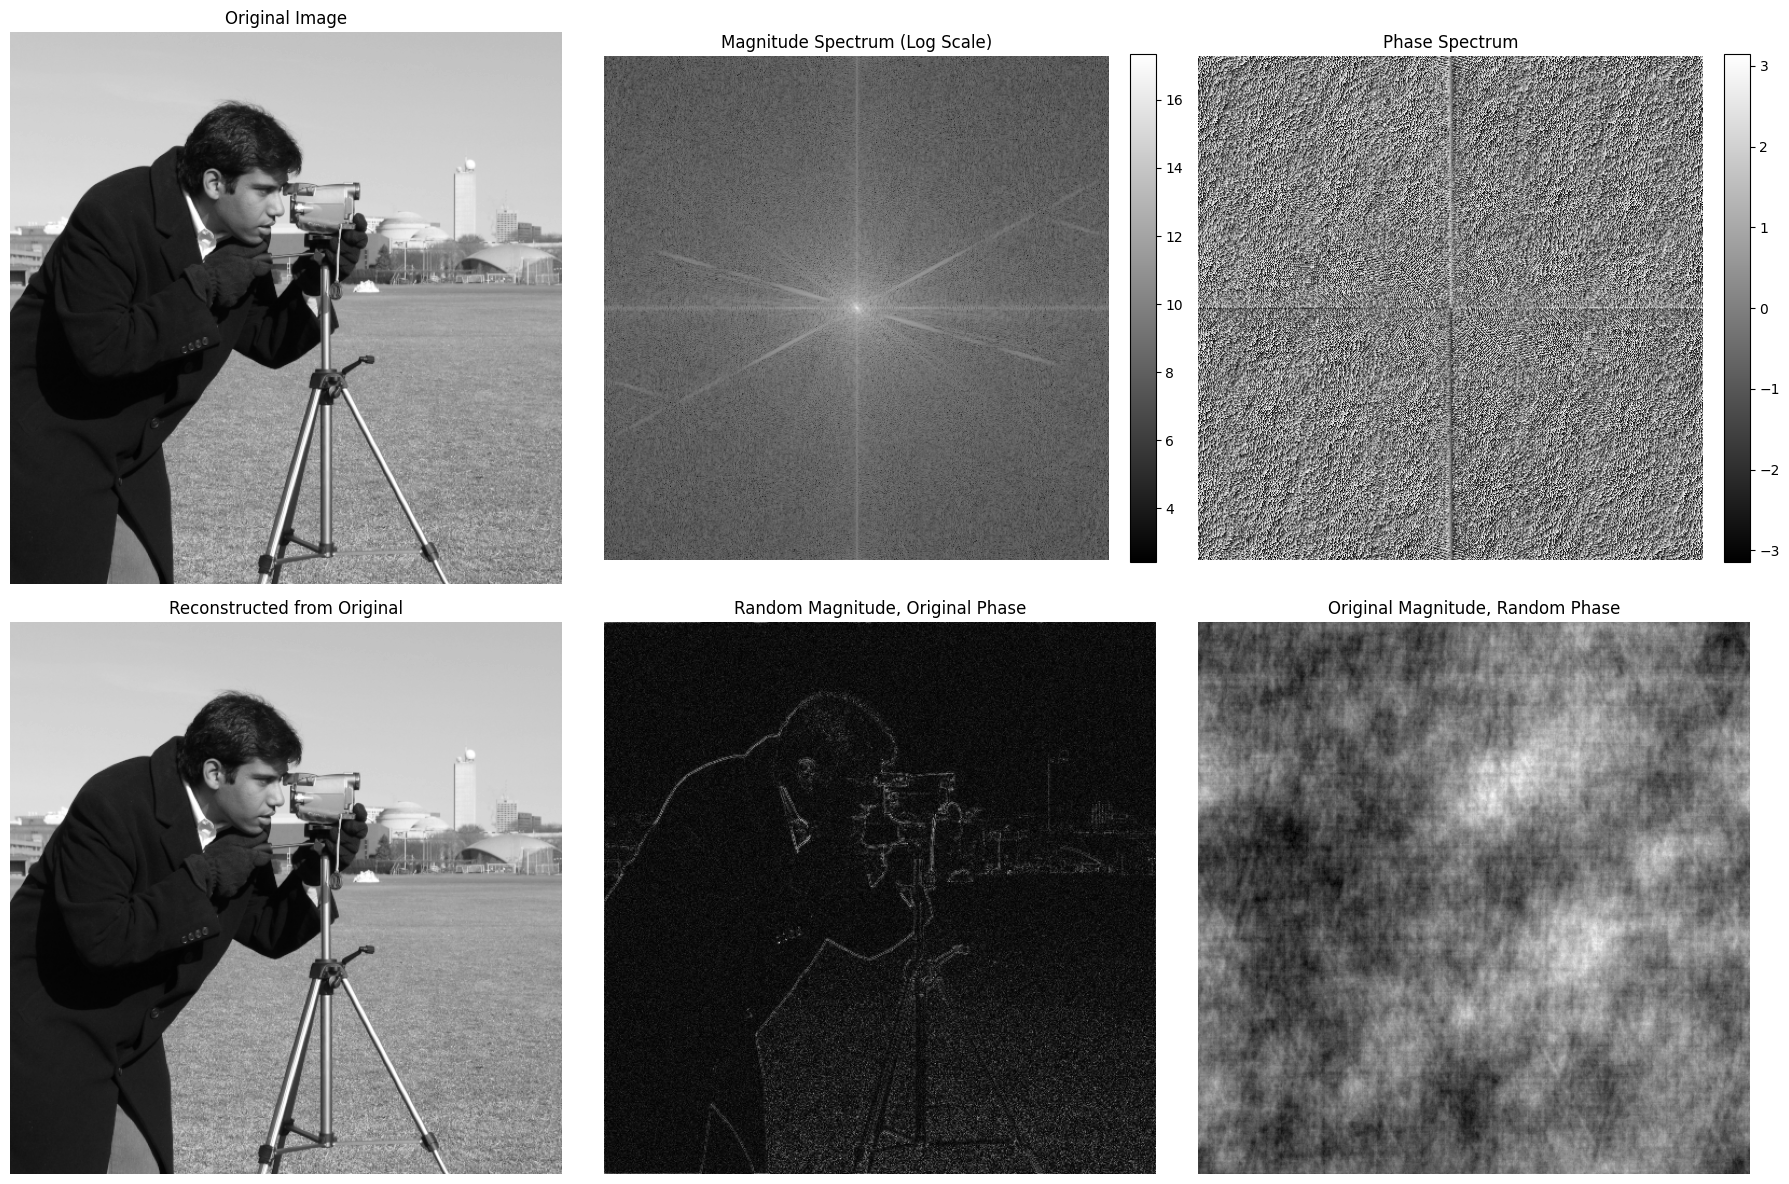

In [5]:
# Fourier Transform and Phase Importance Demonstration Notebook

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from numpy.fft import fft2, ifft2, fftshift, ifftshift

# Load the cameraman image and convert to grayscale
image = data.camera()

# Compute the 2D Fourier Transform and get magnitude and phase
dft = fft2(image)
dft_shifted = fftshift(dft)  # Shift zero frequency to the center
magnitude = np.abs(dft_shifted)
phase = np.angle(dft_shifted)

# Reconstruct the image with original phase but randomized magnitude
random_magnitude = np.random.rand(*magnitude.shape) * np.max(magnitude)
new_dft_with_random_magnitude = random_magnitude * np.exp(1j * phase)
image_with_random_magnitude = np.abs(ifft2(ifftshift(new_dft_with_random_magnitude)))

# Reconstruct the image with original magnitude but randomized phase
random_phase = np.random.rand(*phase.shape) * 2 * np.pi - np.pi
new_dft_with_random_phase = magnitude * np.exp(1j * random_phase)
image_with_random_phase = np.abs(ifft2(ifftshift(new_dft_with_random_phase)))

# Plot the original image, magnitude, phase, and transformed images
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Original image
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

# Magnitude spectrum of the original image (log-scaled for visualization)
magnitude_plot = ax[0, 1].imshow(np.log1p(magnitude), cmap='gray')
ax[0, 1].set_title("Magnitude Spectrum (Log Scale)")
ax[0, 1].axis('off')
plt.colorbar(magnitude_plot, ax=ax[0, 1], fraction=0.046, pad=0.04)

# Phase spectrum of the original image
phase_plot = ax[0, 2].imshow(phase, cmap='gray')
ax[0, 2].set_title("Phase Spectrum")
ax[0, 2].axis('off')
plt.colorbar(phase_plot, ax=ax[0, 2], fraction=0.046, pad=0.04)

# Reconstructed original image from magnitude and phase
reconstructed = np.abs(ifft2(ifftshift(dft_shifted)))
ax[1, 0].imshow(reconstructed, cmap='gray')
ax[1, 0].set_title("Reconstructed from Original")
ax[1, 0].axis('off')

# Image with random magnitude, original phase
ax[1, 1].imshow(image_with_random_magnitude, cmap='gray')
ax[1, 1].set_title("Random Magnitude, Original Phase")
ax[1, 1].axis('off')

# Image with original magnitude, random phase
ax[1, 2].imshow(image_with_random_phase, cmap='gray')
ax[1, 2].set_title("Original Magnitude, Random Phase")
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()
